# Brain Tumor Classification Task
Alessio Carnevale, Manuel Cattoni, Carlo Schillaci

Dataset link: [Kaggle](https://www.kaggle.com/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

from functions import display_images_by_category, display_image_with_annotations, display_images_with_coco_annotations, visualize_annotation_mask, create_mask, sample_annotation_mask_pixels, extract_patches
from skimage import io
import os


import kagglehub
import random

In [2]:
# Download latest version
path = kagglehub.dataset_download("pkdarabi/brain-tumor-image-dataset-semantic-segmentation")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\manuc\.cache\kagglehub\datasets\pkdarabi\brain-tumor-image-dataset-semantic-segmentation\versions\1


In [3]:
# Load the annotations file
with open('Dataset/train/_annotations.coco.json', 'r') as file:
    annotations = json.load(file)

# Print the JSON content in a readable format
print(json.dumps(annotations, indent=4))

{
    "info": {
        "year": "2023",
        "version": "1",
        "description": "Exported from roboflow.com",
        "contributor": "",
        "url": "https://public.roboflow.com/object-detection/undefined",
        "date_created": "2023-08-19T04:37:54+00:00"
    },
    "licenses": [
        {
            "id": 1,
            "url": "https://creativecommons.org/licenses/by/4.0/",
            "name": "CC BY 4.0"
        }
    ],
    "categories": [
        {
            "id": 0,
            "name": "Tumor",
            "supercategory": "none"
        },
        {
            "id": 1,
            "name": "0",
            "supercategory": "Tumor"
        },
        {
            "id": 2,
            "name": "1",
            "supercategory": "Tumor"
        }
    ],
    "images": [
        {
            "id": 0,
            "license": 1,
            "file_name": "2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg",
            "height": 640,
            "width": 640,
            "da

In [4]:
with open('Dataset/train/_annotations.coco.json','r') as file:
    train = json.load(file)

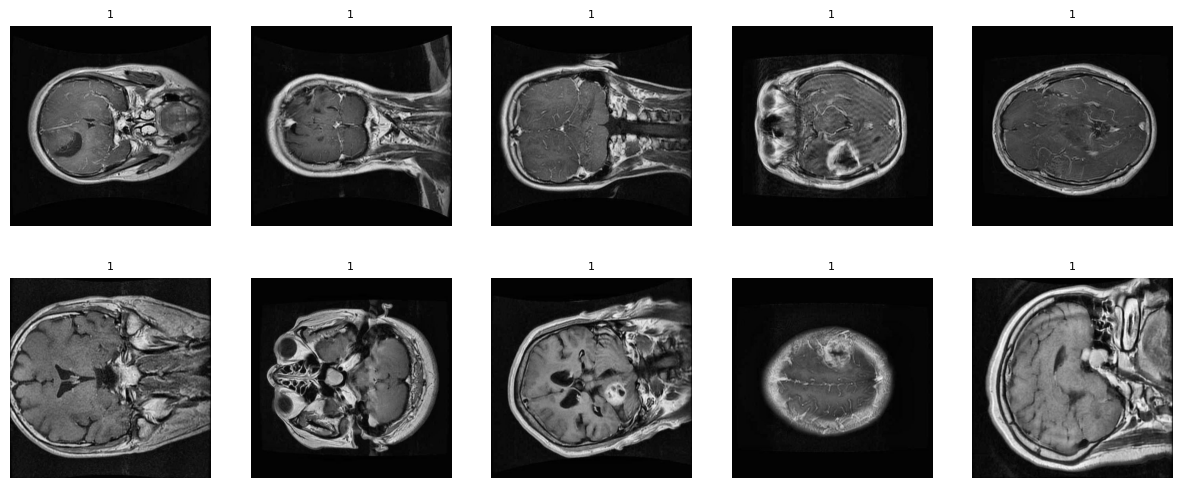

In [5]:
random_images = random.sample(train['images'], 10)

plt.figure(figsize=(15, 6))

for i, img_info in enumerate(random_images):
    img_path = os.path.join('Dataset/train', img_info['file_name'])
    
    img = io.imread(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_info['license'], fontsize=8)
    plt.axis('off')

plt.show()

JSON description for 216_jpg.rf.bc9e882c38430837443d6129356d620c.jpg:
{'id': 783, 'license': 1, 'file_name': '216_jpg.rf.bc9e882c38430837443d6129356d620c.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 2376_jpg.rf.926fb8560cd38676f89d32ce773ec0a4.jpg:
{'id': 553, 'license': 1, 'file_name': '2376_jpg.rf.926fb8560cd38676f89d32ce773ec0a4.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1976_jpg.rf.53eecf7dec55495ad9560c7e8134ba18.jpg:
{'id': 162, 'license': 1, 'file_name': '1976_jpg.rf.53eecf7dec55495ad9560c7e8134ba18.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1705_jpg.rf.4e00bc2c3c62869a2788b14c0f2d91ca.jpg:
{'id': 114, 'license': 1, 'file_name': '1705_jpg.rf.4e00bc2c3c62869a2788b14c0f2d91ca.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1376_jpg.rf.5e0c11551be99755c3368

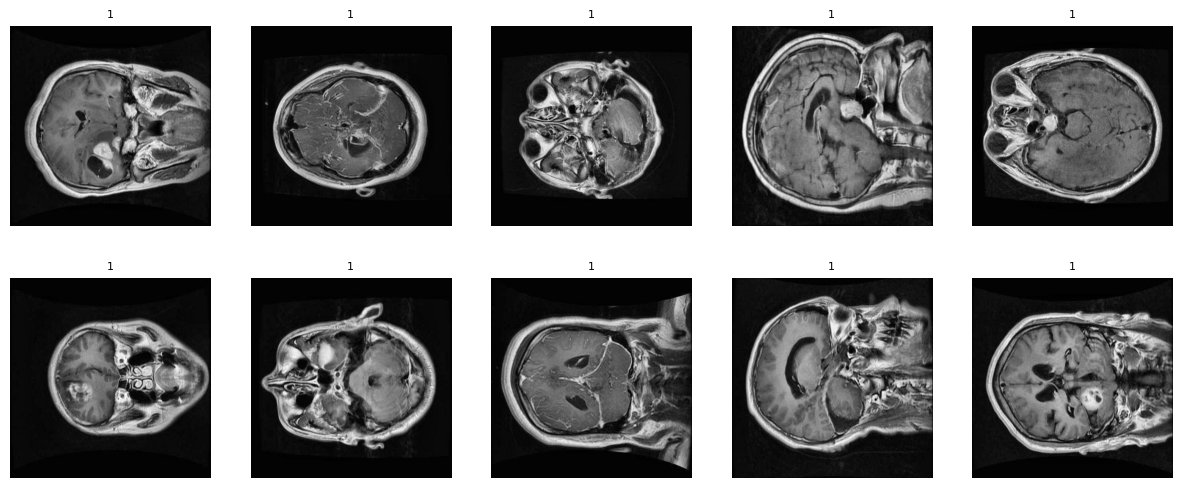

In [6]:
random_images = random.sample(train['images'], 10)

plt.figure(figsize=(15, 6))

for i, img_info in enumerate(random_images):
    img_path = os.path.join('Dataset/train', img_info['file_name'])
    
    img = io.imread(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_info['license'], fontsize=8)
    plt.axis('off')

    # Print the full JSON description for the image
    print(f"JSON description for {img_info['file_name']}:")
    print(img_info)

plt.show()

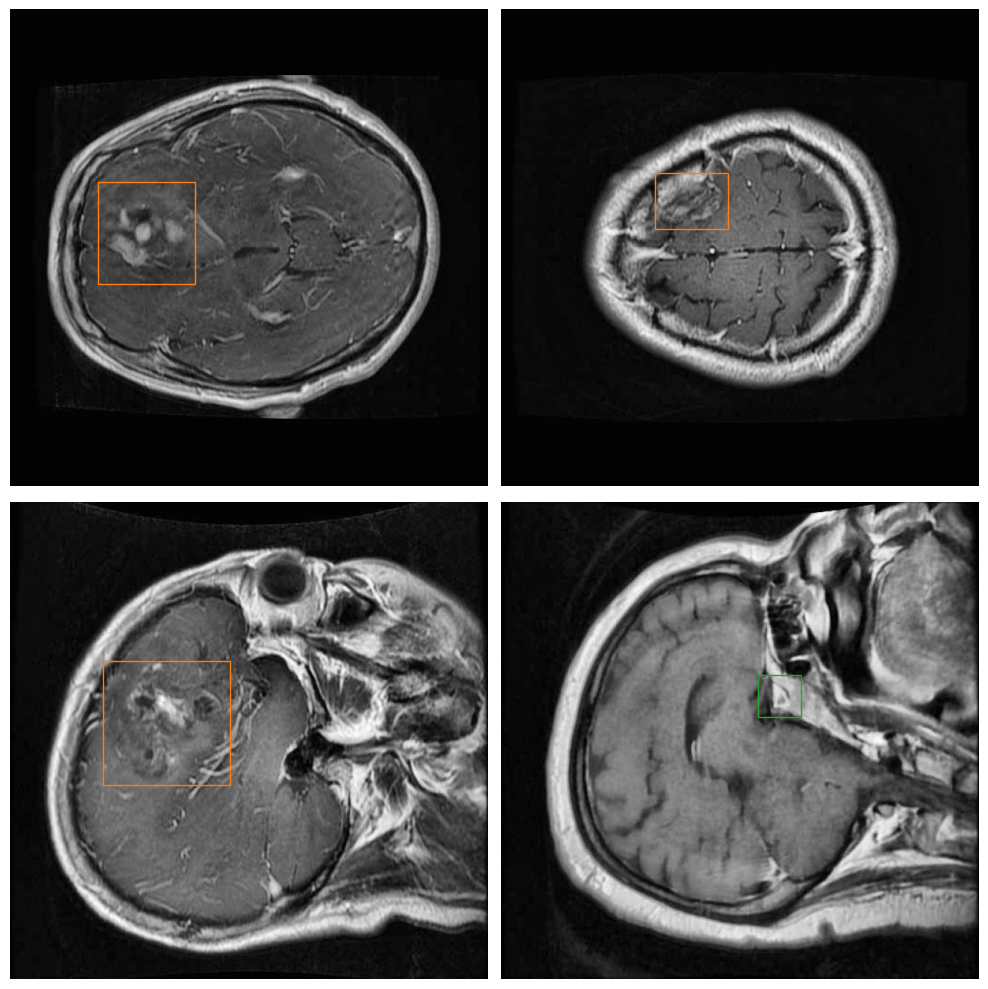

In [7]:
all_image_files = [os.path.join('Dataset/train', img['file_name']) for img in train['images']]
random_image_files = random.sample(all_image_files, 4)

# Choose between 'bbox', 'seg', or 'both'
display_type = 'seg'
display_images_with_coco_annotations(random_image_files, train, display_type)

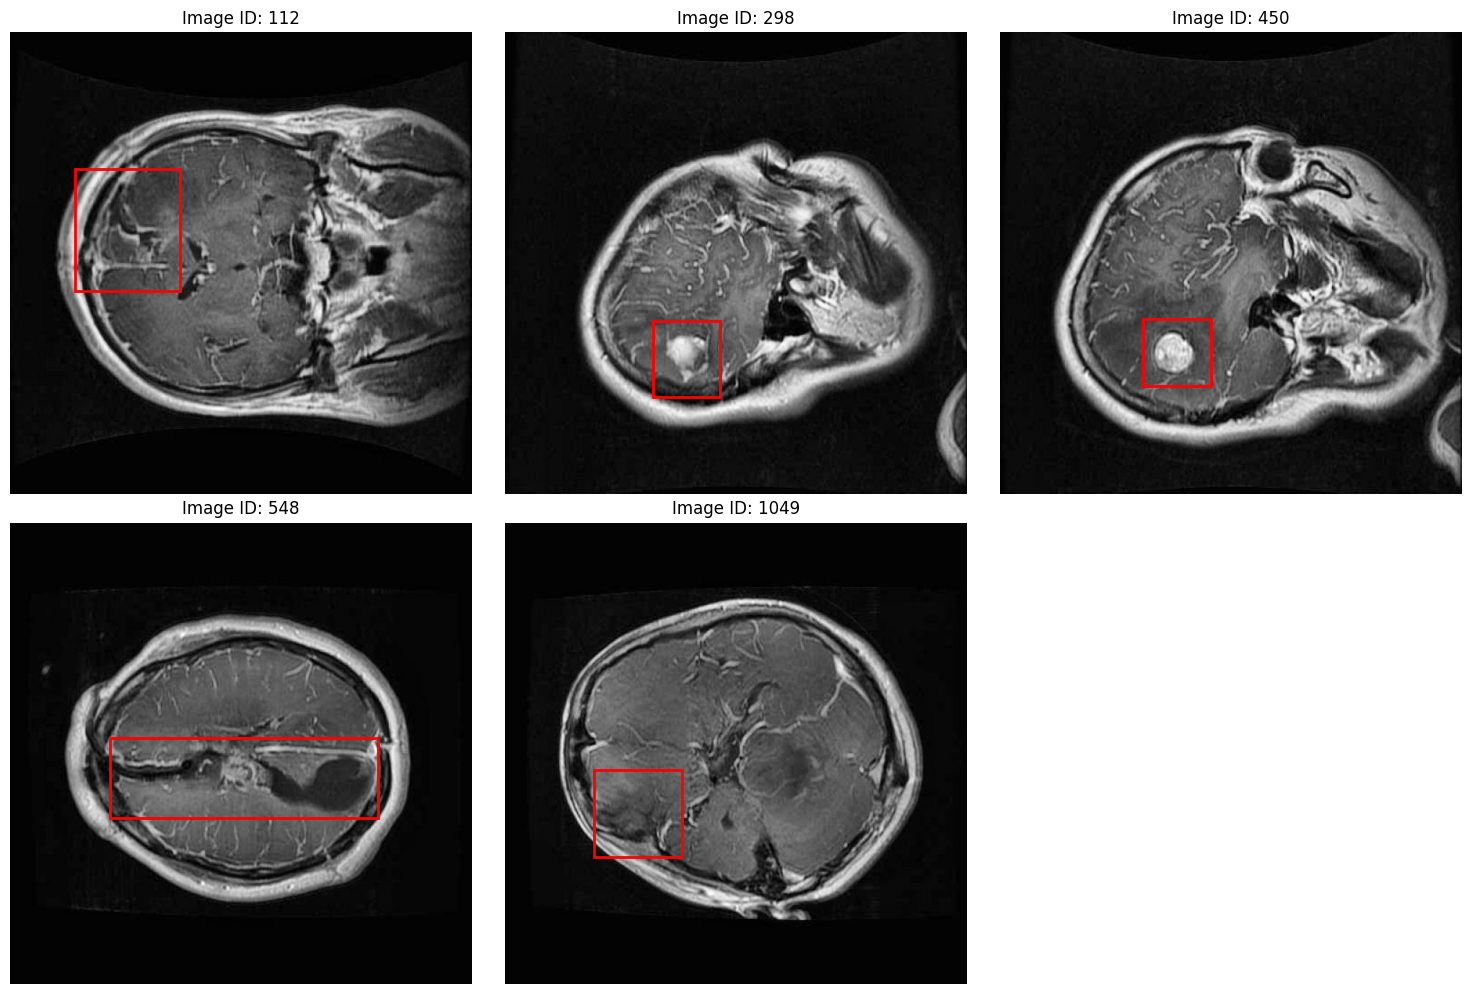

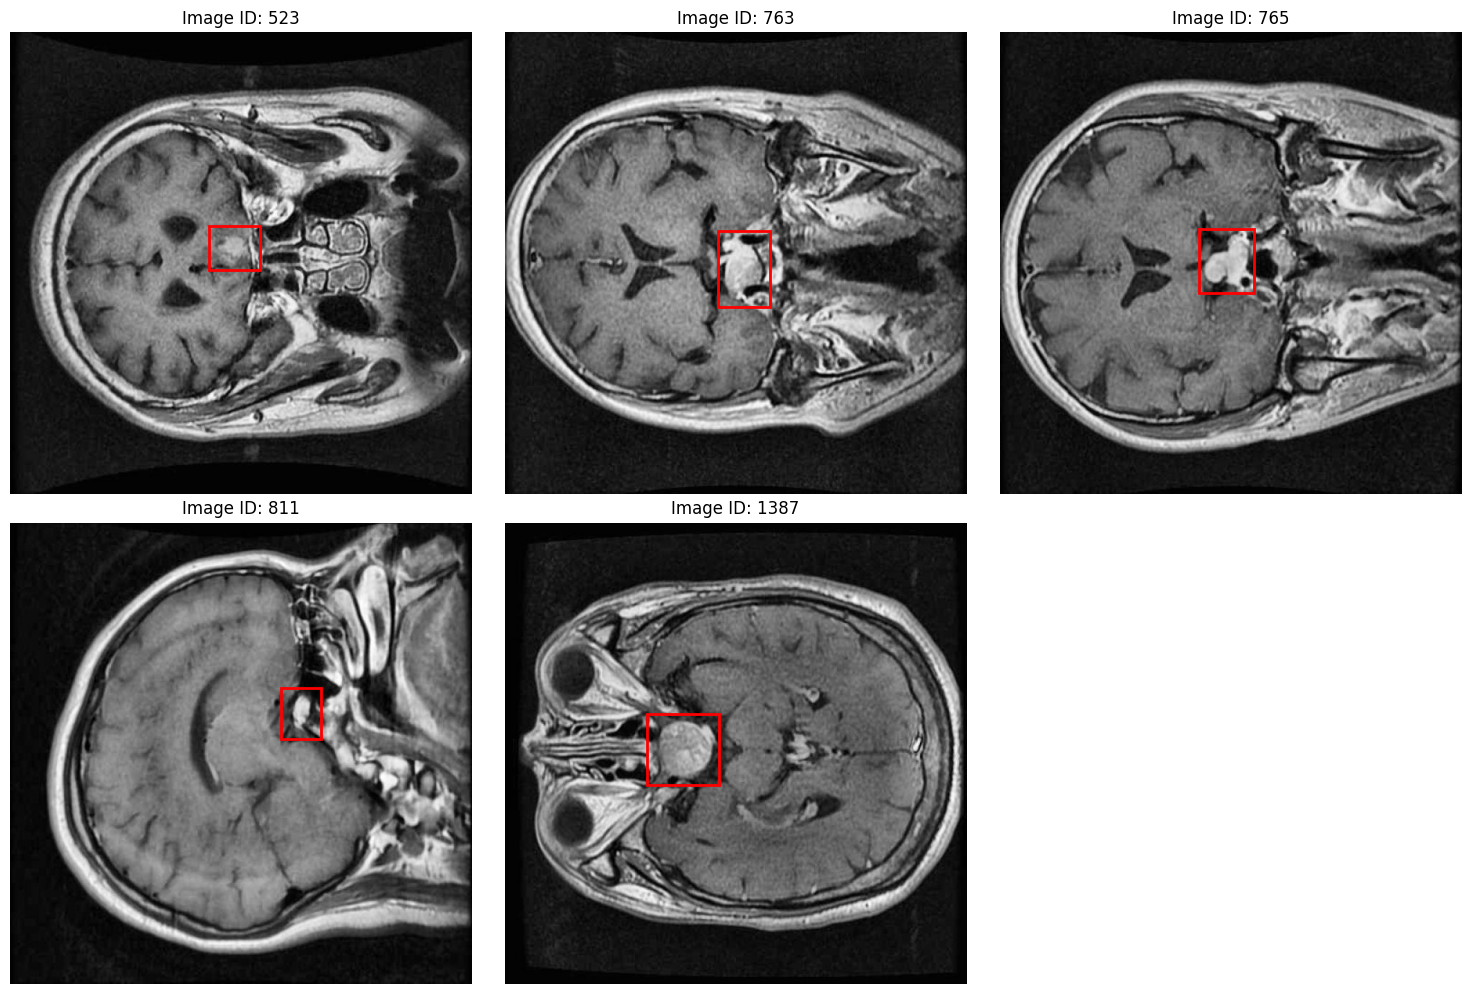

In [8]:
# Display 5 random images for category_id = 1
display_images_by_category(train, category_id=1, num_images=5)

# Display 5 random images for category_id = 2
display_images_by_category(train, category_id=2, num_images=5)

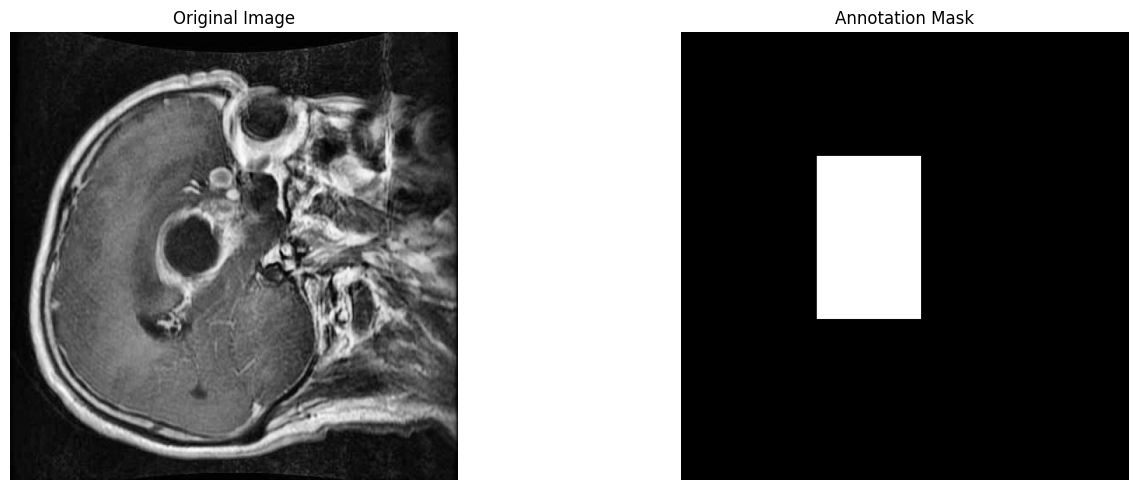

In [9]:
# Example usage
visualize_annotation_mask(train, image_id=1, show_annotations=False)

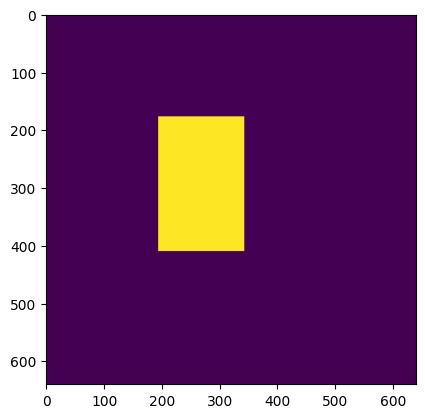

In [10]:
test_mask = create_mask(train, image_id=1)
plt.imshow(test_mask)

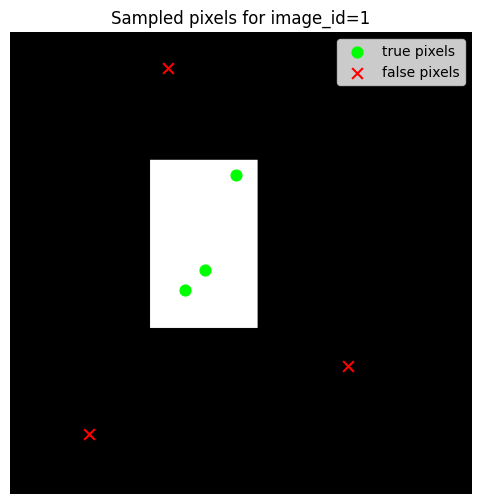

True pixels: [(329, 270), (197, 312), (357, 242)]
False pixels: [(50, 219), (462, 468), (557, 109)]


In [11]:
image_id = 1
mask = create_mask(train, image_id=1)

samples = sample_annotation_mask_pixels(
    mask, num_true=3, num_false=3, random_state=42
)

plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray')
plt.scatter(
    [coord[1] for coord in samples["true"]],
    [coord[0] for coord in samples["true"]],
    marker='o',
    color='lime',
    label='true pixels',
    s=60,
)
plt.scatter(
    [coord[1] for coord in samples["false"]],
    [coord[0] for coord in samples["false"]],
    marker='x',
    color='red',
    label='false pixels',
    s=60,
)
plt.legend()
plt.title(f"Sampled pixels for image_id={image_id}")
plt.axis('off')
plt.show()

print("True pixels:", samples["true"])
print("False pixels:", samples["false"])

In [15]:
patches_total = []
labels_total = []

for img_id in range(len(train['images'][:20])):
    print(img_id)
    patches, labels = extract_patches(annotations, image_id)
    patches_total.append(patches_total)
    labels_total.append(labels)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
patches_test, labels_test = extract_patches(annotations, image_id)

In [ ]:
a = 0
b = 0
for n in labels:
    if n != 255:
        a+=1
    else:
        b += 1
        
print(a)
print(b)

NameError: name 'labels' is not defined

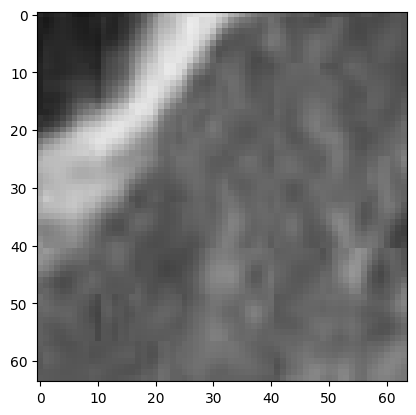

In [ ]:
plt.imshow(patches[0])